In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os              
import numpy as np  

In [7]:
scenario_0 = pd.read_csv('../experiment/vehicle_scenario_0.csv')
scenario_1 = pd.read_csv('../experiment/vehicle_scenario_1.csv')
scenario_2 = pd.read_csv('../experiment/vehicle_scenario_2.csv')
scenario_3 = pd.read_csv('../experiment/vehicle_scenario_3.csv')
scenario_4 = pd.read_csv('../experiment/vehicle_scenario_4.csv')

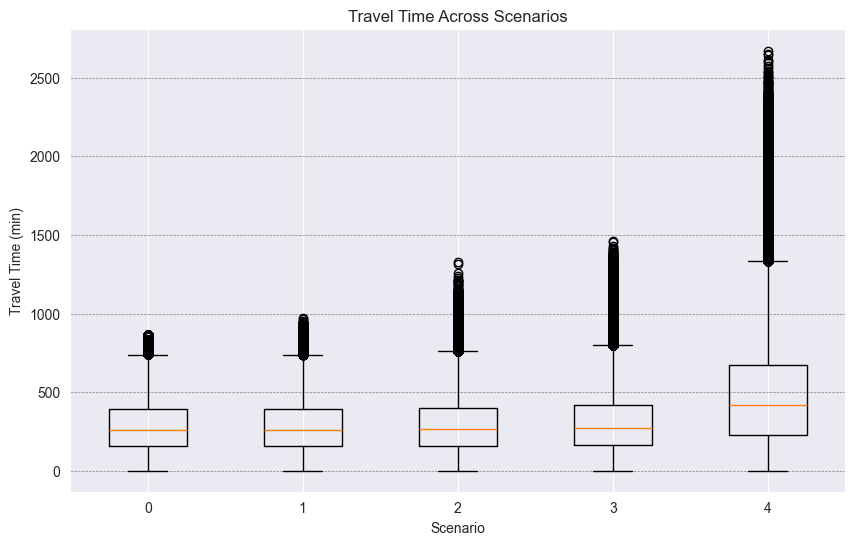

In [8]:
# Extract travel times
travel_times = [
    scenario_0['travel_time'],
    scenario_1['travel_time'],
    scenario_2['travel_time'],
    scenario_3['travel_time'],
    scenario_4['travel_time']
]

# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(travel_times, labels=['0', '1', '2', '3', '4'])
plt.title('Travel Time Across Scenarios')
plt.ylabel('Travel Time (min)')
plt.xlabel('Scenario')

# Improve the plot aesthetics
plt.gca().spines['top'].set_visible(False)  # Remove the top line
plt.gca().spines['right'].set_visible(False)  # Remove the right line
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y', color='grey')  # Add a grid to the background

plt.show()


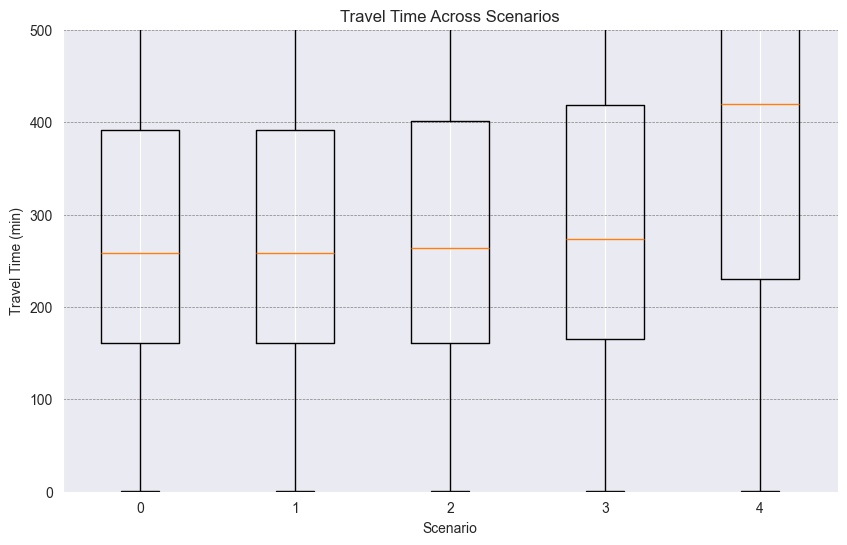

In [9]:
# Create the box plot with adjustments
plt.figure(figsize=(10, 6))
plt.boxplot(travel_times, labels=['0', '1', '2', '3', '4'])
plt.title('Travel Time Across Scenarios')
plt.ylabel('Travel Time (min)')
plt.xlabel('Scenario')

# Adjusting plot aesthetics
plt.gca().spines['top'].set_visible(False)  # Remove the top line
plt.gca().spines['right'].set_visible(False)  # Remove the right line
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y', color='grey')  # Add a grid to the background

# Zooming in on the y-axis
plt.ylim(0, 500)  # Adjust these limits based on your data's travel time range

plt.show()


In [10]:
# Calculate the average travel time for each scenario
average_travel_times = {
    'Scenario': ['0', '1', '2', '3', '4'],
    'Average Travel Time': [
        scenario_0['travel_time'].mean(),
        scenario_1['travel_time'].mean(),
        scenario_2['travel_time'].mean(),
        scenario_3['travel_time'].mean(),
        scenario_4['travel_time'].mean(),
    ]
}

# Convert to DataFrame for display
average_travel_times_df = pd.DataFrame(average_travel_times)

print(average_travel_times_df)


  Scenario  Average Travel Time
0        0           286.457663
1        1           286.578327
2        2           294.254544
3        3           312.739818
4        4           491.840080


In [11]:
#for finding the top 5 bridges that have the highest delay time
bridge_scenario_files = [
    '../experiment/bridge_scenario_0.csv',
    '../experiment/bridge_scenario_1.csv',
    '../experiment/bridge_scenario_2.csv',
    '../experiment/bridge_scenario_3.csv',
    '../experiment/bridge_scenario_4.csv'
]

all_bridges_data = pd.DataFrame()

# Load and append the data from each scenario
for file_path in bridge_scenario_files:
    scenario_data = pd.read_csv(file_path)
    all_bridges_data = pd.concat([all_bridges_data, scenario_data])

# Now, let's include the 'Road_Name' in our grouping to keep this information
grouped_data = all_bridges_data.groupby(['id', 'road_name'])

# Calculate the total delay for each bridge
total_delays = grouped_data['delay_time'].sum()

# Sort the results to get the bridges with the most delay
sorted_delays = total_delays.sort_values(ascending=False)

# Get the top 5 bridges with the most delay
top_5_bridges = sorted_delays.head(5)

# Display the top 5 bridges along with their road names and the total delay
print(top_5_bridges)

C:\Users\gabby\AppData\Local\Temp\ipykernel_16124\2107716467.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_bridges_data = pd.concat([all_bridges_data, scenario_data])


id       road_name
11604.0  N2           5470972.0
10497.0  N1           3456232.0
10199.0  N1           1542725.0
10359.0  N1           1468265.0
10729.0  N1           1332909.0
Name: delay_time, dtype: float64


In [12]:
# Example paths to your CSV files
centrality_files = [
    '../experiment/centrality_scenario_0.csv',
    '../experiment/centrality_scenario_1.csv',
    '../experiment/centrality_scenario_2.csv',
    '../experiment/centrality_scenario_3.csv',
    '../experiment/centrality_scenario_4.csv'
]

# Load and concatenate the data from all files into a single DataFrame
combined_df = pd.concat([pd.read_csv(file) for file in centrality_files], ignore_index=True)

# Specify the columns to include in the output
output_columns = ['id', 'road', 'model_type']

# Find the top 5 entities for degree centrality
top_5_degree_entities = combined_df.nlargest(5, 'degree')[output_columns]

# Find the top 5 entities for betweenness centrality
top_5_betweenness_entities = combined_df.nlargest(5, 'betweenness')[output_columns]

# Find the top 5 entities for closeness centrality
top_5_closeness_entities = combined_df.nlargest(5, 'closeness')[output_columns]

print("Top 5 Entities by Degree:\n", top_5_degree_entities)
print("\nTop 5 Entities by Betweenness:\n", top_5_betweenness_entities)
print("\nTop 5 Entities by Closeness:\n", top_5_closeness_entities)


Top 5 Entities by Degree:
           id                                               road  \
3    10003.0  id\r\n10003.0    N1\r\n10003.0    N2\r\ndtype:...   
9    10009.0  id\r\n10009.0      N1\r\n10009.0    N105\r\ndt...   
79   10079.0  id\r\n10079.0      N1\r\n10079.0    N102\r\ndt...   
87   10087.0  id\r\n10087.0      N1\r\n10087.0    R140\r\ndt...   
133  10133.0  id\r\n10133.0      N1\r\n10133.0    N104\r\ndt...   

                                            model_type  
3    id\r\n10003.0    intersection\r\n10003.0    in...  
9    id\r\n10009.0    intersection\r\n10009.0    in...  
79   id\r\n10079.0    intersection\r\n10079.0    in...  
87   id\r\n10087.0    intersection\r\n10087.0    in...  
133  id\r\n10133.0    intersection\r\n10133.0    in...  

Top 5 Entities by Betweenness:
            id                                               road  \
79    10079.0  id\r\n10079.0      N1\r\n10079.0    N102\r\ndt...   
1902  10079.0  id\r\n10079.0      N1\r\n10079.0    N102\r\n